<h1>Zadatak 1</h1>

In [478]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [479]:
# Import required libraries
import pandas as pd

from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Izvršićemo faktorsku analizu na podacima BFI (skup podataka zasnovan na projektu procene ličnosti), koji su prikupljeni korišćenjem skale odgovora od 6 poena: 1 veoma netačan, 2 umereno netačan, 3 malo netačan, 4 blago tačan, 5 umereno tačan i 6 veoma tačan.

In [480]:
df= pd.read_csv("bfi.csv")
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [481]:
df.columns


Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [482]:
df=df.set_index('Unnamed: 0')

In [483]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)


In [484]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2784 non-null   float64
 1   A2      2773 non-null   float64
 2   A3      2774 non-null   float64
 3   A4      2781 non-null   float64
 4   A5      2784 non-null   float64
 5   C1      2779 non-null   float64
 6   C2      2776 non-null   float64
 7   C3      2780 non-null   float64
 8   C4      2774 non-null   float64
 9   C5      2784 non-null   float64
 10  E1      2777 non-null   float64
 11  E2      2784 non-null   float64
 12  E3      2775 non-null   float64
 13  E4      2791 non-null   float64
 14  E5      2779 non-null   float64
 15  N1      2778 non-null   float64
 16  N2      2779 non-null   float64
 17  N3      2789 non-null   float64
 18  N4      2764 non-null   float64
 19  N5      2771 non-null   float64
 20  O1      2778 non-null   float64
 21  O2      2800 non-null   int64  


In [485]:
df.head()


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [486]:
df.dropna(inplace=True)

Pre nego što izvršite faktorsku analizu, potrebno je da procenite „faktorabilnost“ našeg skupa podataka. Faktorabilnost znači "možemo li pronaći faktore u skupu podataka?". Postoje dve metode za proveru faktorabilnosti ili adekvatnosti uzorkovanja:

Bartletov test
Kaiser-Meier-Olkin test
Bartletov test sferičnosti proverava da li su posmatrane varijable uopšte međusobno korelirane koristeći posmatranu matricu korelacije u odnosu na matricu identiteta. Ako je test pokazao statistički beznačajan, ne bi trebalo da koristite faktorsku analizu.

In [487]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df)

(18146.06557723538, 0.0)

U ovom Bartletovom testu, p-vrednost je 0. Test je statistički značajan, što ukazuje da uočena matrica korelacije nije matrica identiteta.

Kaiser-Meier-Olkin (KMO) test meri podobnost podataka za faktorsku analizu. On određuje adekvatnost za svaku posmatranu varijablu i za kompletan model. KMO procenjuje udeo varijanse među svim posmatranim varijablama. Niži udeo je pogodniji za faktorsku analizu. Vrednosti KMO se kreću između 0 i 1. Vrednost KMO manja od 0,6 se smatra neadekvatnom.

In [488]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model)

0.8486452309468383


Ukupan KMO za naše podatke je 0,84, što je odlično. Ova vrednost ukazuje da možete nastaviti sa planiranom faktorskom analizom.

In [489]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Ovde možete videti da su sopstvene vrednosti veće od jedan za 6 faktora. To znači da treba da izaberemo samo 6 faktora (ili neopaženih varijabli).

In [490]:
df.shape[1]+1

26

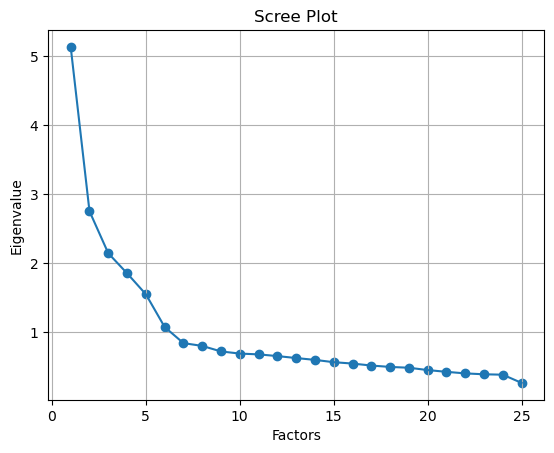

In [491]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


Scree plot 

In [492]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

           0         1         2         3         4         5
A1  0.095220  0.040783  0.048734 -0.530987 -0.113057  0.161216
A2  0.033131  0.235538  0.133714  0.661141  0.063734 -0.006244
A3 -0.009621  0.343008  0.121353  0.605933  0.033990  0.160106
A4 -0.081518  0.219717  0.235140  0.404594 -0.125338  0.086356
A5 -0.149616  0.414458  0.106382  0.469698  0.030977  0.236519
C1 -0.004358  0.077248  0.554582  0.007511  0.190124  0.095035
C2  0.068330  0.038370  0.674545  0.057055  0.087593  0.152775
C3 -0.039994  0.031867  0.551164  0.101282 -0.011338  0.008996
C4  0.216283 -0.066241 -0.638475 -0.102617 -0.143846  0.318359
C5  0.284187 -0.180812 -0.544838 -0.059955  0.025837  0.132423
E1  0.022280 -0.590451  0.053915 -0.130851 -0.071205  0.156583
E2  0.233624 -0.684578 -0.088497 -0.116716 -0.045561  0.115065
E3 -0.000895  0.556774  0.103390  0.179396  0.241180  0.267291
E4 -0.136788  0.658395  0.113798  0.241143 -0.107808  0.158513
E5  0.034490  0.507535  0.309813  0.078804  0.200821  0

Faktor 1 ima veliko faktorsko opterećenje za E1, E2, E3, E4 i E5 (ekstraverzija)

Faktor 2 ima veliko faktorsko opterećenje za N1,N2,N3,N4 i N5 (neuroticizam)

Faktor 3 ima veliko faktorsko opterećenje za C1, C2, C3, C4 i C5 (savesnost)

Faktor 4 ima visoka faktorska opterećenja za O1,O2,O3,O4 i O5 (otvorenost)

Faktor 5 ima veliko faktorsko opterećenje za A1, A2, A3, A4 i A5 (prijatnost)


Faktor 6 nema ni jednu visoku vrednost za bilo koju promenljivu i nije ga lako interpretirati.
Uradićemo faktorsku analizu za 5 faktora.

In [493]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

           0         1         2         3         4
A1  0.111126  0.040465  0.022798 -0.428166 -0.077931
A2  0.029588  0.213716  0.139037  0.626946  0.062139
A3  0.009357  0.317848  0.109331  0.650743  0.056196
A4 -0.066476  0.204566  0.230584  0.435624 -0.112700
A5 -0.122113  0.393034  0.087869  0.537087  0.066708
C1  0.010416  0.070184  0.545824  0.038878  0.209584
C2  0.089574  0.033270  0.648731  0.102782  0.115434
C3 -0.030855  0.023907  0.557036  0.111578 -0.005183
C4  0.240410 -0.064984 -0.633806 -0.037498 -0.107535
C5  0.290318 -0.176395 -0.562467 -0.047525  0.036822
E1  0.042819 -0.574835  0.033144 -0.104813 -0.058795
E2  0.244743 -0.678731 -0.102483 -0.112517 -0.042010
E3  0.024180  0.536816  0.083010  0.257906  0.280877
E4 -0.115614  0.646833  0.102023  0.306101 -0.073422
E5  0.036145  0.504069  0.312899  0.090354  0.213739
N1  0.786807  0.078923 -0.045997 -0.216363 -0.084704
N2  0.754109  0.027301 -0.030568 -0.193744 -0.010304
N3  0.731721 -0.061430 -0.067084 -0.027712 -0.

In [494]:
# Get variance of each factors
fa.get_factor_variance()
#SS loadings
#Proportion Var
#Cumulative Var

(array([2.70963262, 2.47308983, 2.04110564, 1.84449799, 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))

Ukupna kumulativna varijansa objašnjena sa 5 faktora je 42%

<h1> Zadatak 2</h1>

In [495]:
fifa_results= pd.read_csv(r"C:\Users\katar\Desktop\MASINSKO\FIFA 2018 Statistics.csv")
fifa_results

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [496]:
fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [497]:
numerical = [var for var in fifa_results.columns if fifa_results[var].dtype==('int64' or'float64') ]
numerical

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

In [498]:
fifa=fifa_results[numerical]
fifa.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0


In [499]:
fifa.isnull().sum()

Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Goals in PSO              0
dtype: int64

In [500]:
calculate_bartlett_sphericity(fifa)

(1389.492727891028, 3.539529585798628e-198)

In [501]:
kmo_all, kmo_model = calculate_kmo(fifa)
print(kmo_model)
print(kmo_all)

0.5775901732816928
[0.71504419 0.74920883 0.52602156 0.37589405 0.35407164 0.43287517
 0.93568892 0.47918642 0.49018425 0.78050519 0.84079744 0.71863806
 0.55628866 0.70710659 0.60634719 0.53662101 0.50953921 0.57572578]


In [502]:
col=['Attempts','On-Target','Off-Target','Blocked','Offsides','Free Kicks','Saves','Distance Covered (Kms)','Yellow & Red','Red','Goals in PSO']
fifa.drop(col,axis=1,inplace=True)
fifa.head()

C:\Users\katar\AppData\Local\Temp\ipykernel_17308\3654973159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa.drop(col,axis=1,inplace=True)


,Goal Scored,Ball Possession %,Corners,Pass Accuracy %,Passes,Fouls Committed,Yellow Card
0,5,40,6,78,306,22,0
1,0,60,2,86,511,10,0
2,0,43,0,78,395,12,2
3,1,57,5,86,589,6,0
4,0,64,5,86,433,22,1


In [503]:
round(fifa.corr(),2) # Create a correlation matrix


,Goal Scored,Ball Possession %,Corners,Pass Accuracy %,Passes,Fouls Committed,Yellow Card
Goal Scored,1.00,0.03,0.04,0.14,0.04,0.03,-0.05
Ball Possession %,0.03,1.00,0.54,0.71,0.88,-0.30,-0.21
Corners,0.04,0.54,1.00,0.33,0.52,-0.17,-0.17
Pass Accuracy %,0.14,0.71,0.33,1.00,0.69,-0.33,-0.11
Passes,0.04,0.88,0.52,0.69,1.00,-0.35,-0.22
Fouls Committed,0.03,-0.30,-0.17,-0.33,-0.35,1.00,0.43
Yellow Card,-0.05,-0.21,-0.17,-0.11,-0.22,0.43,1.00


In [504]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(fifa)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.15552906, 1.1867033 , 1.00786716, 0.73999213, 0.50530728,
       0.28938546, 0.1152156 ])

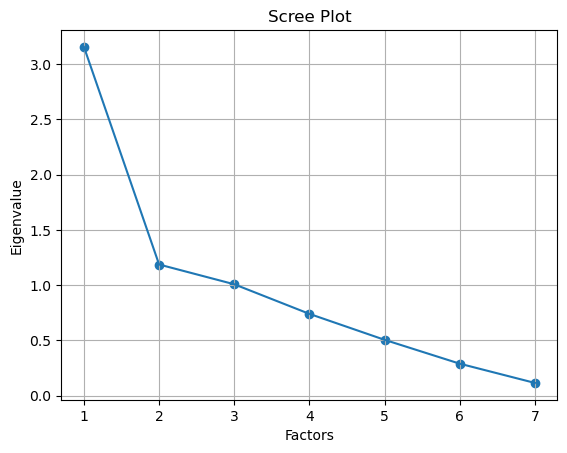

In [505]:
# Create scree plot using matplotlib
plt.scatter(range(1,fifa.shape[1]+1),ev)
plt.plot(range(1,fifa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [506]:
fa = FactorAnalyzer(n_factors=2)
fa.fit(fifa)
print(pd.DataFrame(fa.loadings_,index=fifa.columns,columns=['Factor 1','Factor 2']))

                   Factor 1  Factor 2
Goal Scored        0.088652  0.030491
Ball Possession %  0.949657 -0.050000
Corners            0.523322 -0.045161
Pass Accuracy %    0.674496 -0.121218
Passes             0.884044 -0.124354
Fouls Committed    0.088755  1.026916
Yellow Card       -0.041852  0.418718


Jednan od kriterijuma koje možete da koristiti radi utvrđivanja vrste rotacije (da li ćete koristiti ortogonalnu ili neortogonalnu):

Ako je korelacija između faktora veća od 0.3 bilo bi pogodnije koristiti neortogonalne (oblique) rotacije

Ako je korelacija između faktora manja od 0.3 bilo bi pogodnije koristiti ortogonalne rotacije 

varimax (orthogonal rotation)

promax (oblique rotation)

oblimin (oblique rotation)

oblimax (orthogonal rotation)

quartimin (oblique rotation)

quartimax (orthogonal rotation)

equamax (orthogonal rotation)

geomin_obl (oblique rotation)

geomin_ort (orthogonal rotation)

In [507]:
round(pd.DataFrame(fa.loadings_,index=fifa.columns,columns=['Factor 1','Factor 2']).corr(),2)

,Factor 1,Factor 2
Factor 1,1.00,-0.67
Factor 2,-0.67,1.00


In [508]:
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(fifa)
print(pd.DataFrame(fa.loadings_,index=fifa.columns,columns=['Factor 1','Factor 2']))

                   Factor 1  Factor 2
Goal Scored        0.082020  0.014229
Ball Possession %  0.942969 -0.218667
Corners            0.522645 -0.137849
Pass Accuracy %    0.684389 -0.239753
Passes             0.891113 -0.280223
Fouls Committed   -0.088133  0.995982
Yellow Card       -0.112725  0.420026


Nakon oblique rotacija kao što su promax ili oblimin imamo dva tipa opterećenja: matricu faktorskih opterecenja i matricu strukture (koeficijenti korelacije). Oni nisu jednaki u slucaju neortogonalnih rotacija. Dakle, matrica faktorskih opterecnje može lako biti izvan [-1, 1]. 

Slučaj Hejvuda (Heywood case) predstavlja poteškoću u algoritmima faktorske analize kada na iteracijama fakt.opterecenje premašuje teoretski dozvoljenu veličinu – javlja se kada komunalitet prevaziđe varijansu. Hejvud slučaj je retka situacija i sreće se na nekim skupovima podataka obično kada ima premalo varijabli da podrže traženi broj faktora ili kada je uzorak previse mali.

Rešenja za Hejvud slučajeve: odbacivanje problematičnih indikatora, korigovanje vrednosti, uzimanje većeg uzorka, povećanje broja indikatora po faktoru, i sl.


In [511]:
# Get variance of each factors
fa.get_factor_variance()

# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance


(array([2.45202034, 1.37142912]),
 array([0.35028862, 0.19591845]),
 array([0.35028862, 0.54620707]))

In [512]:
fa.get_communalities()

array([0.00692979, 0.93700558, 0.29215963, 0.52587051, 0.87260675,
       0.99974823, 0.18912898])

Prikazuje koji % varijacija promenljive može biti objašnjen sa 3 faktora (ako je komunalitet manji od 0.3 to je obično upozorenje da se ta promenljiva neće pojaviti ni u jednom faktoru)

<h1> Zadatak 3 </h1>

Ucitajte bazu *avio* (sadrži anketu o zadovoljstvu putnika avio kompanije) i odradite faktorsku analizu, pokusajte da obrazlozite vas zakljucak o faktorima i dajte im odgovoarajuca imena
